In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../')


from astroLuSt.preprocessing import timeseries as alprti
from astroLuSt.styles import plot_styles as alstps

importlib.reload(alprti)
importlib.reload(alstps)

#style for plotting
_ = alstps.tre_light()


np.random.seed(0)

# Generate Some Data

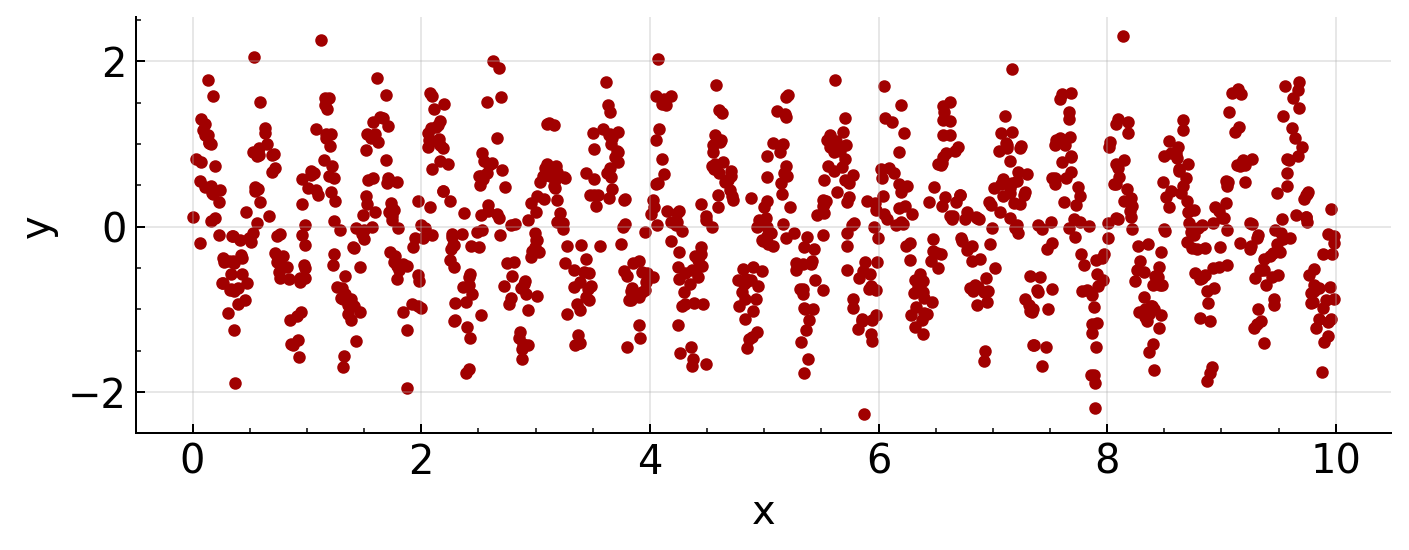

In [2]:
#sine
p = 0.5
x_sin = np.linspace(0,10,1000)
x_sin += np.random.normal(size=x_sin.shape)*0.05
y_sin = np.sin(x_sin*2*np.pi/0.5)  + np.random.normal(size=x_sin.shape)*0.5

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(111)
ax1.scatter(x_sin, y_sin)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()



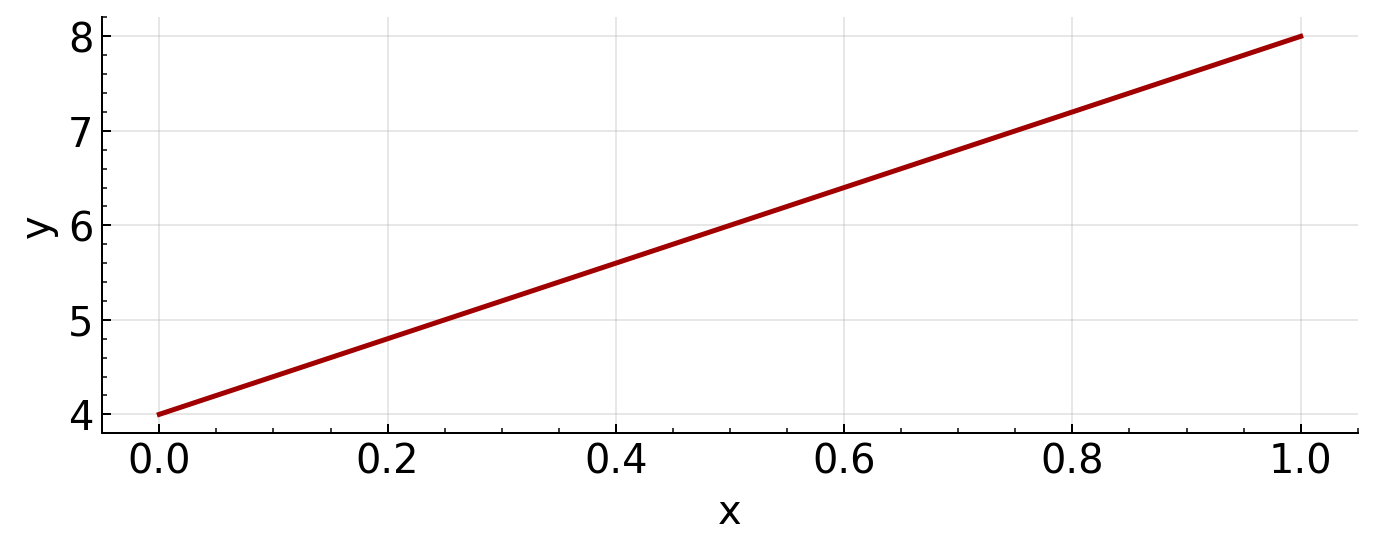

In [3]:
#linear
x = np.linspace(0,1,100)
y = np.linspace(4,8,100)

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(111)
ax1.plot(x, y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()



# `Pad2Size`
Padding Timeseries to Same Shape

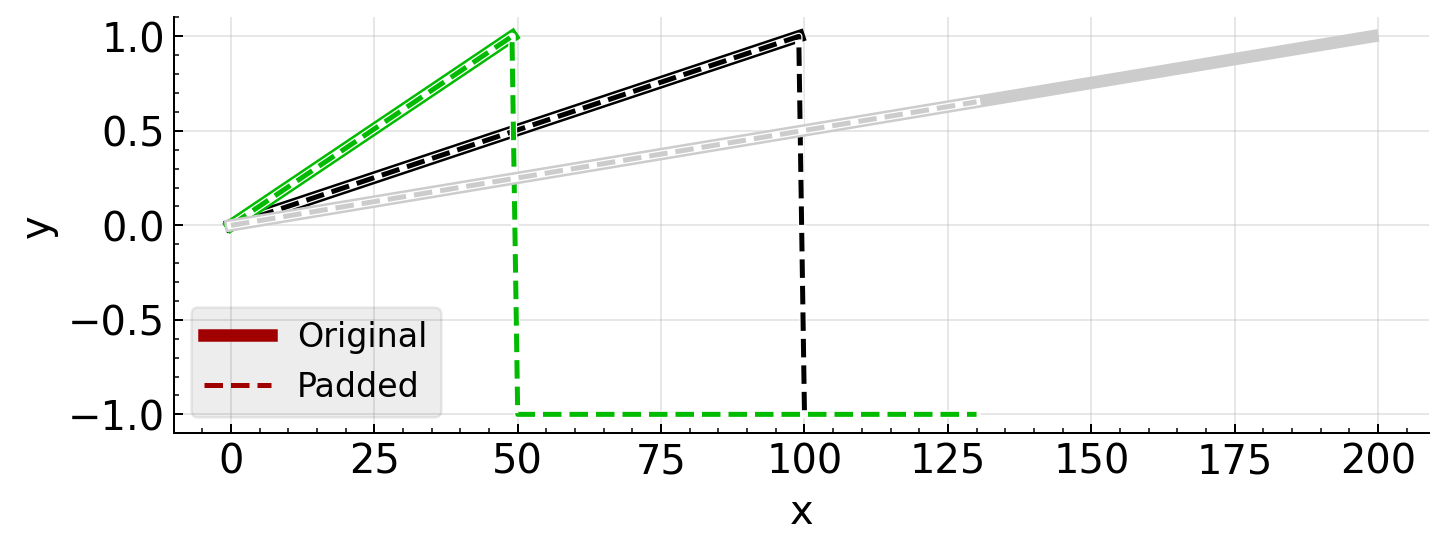

In [4]:
importlib.reload(alprti)

X = [
    np.linspace(0,1,100),
    np.linspace(0,1,50),
    np.linspace(0,1,200),
]

P2S = alprti.Pad2Size(
    size=131,
    subsampling_mode='first',
    verbose=0,
)

P2S.fit(X)
X_pad = P2S.transform(X, pad_kwargs=dict(constant_values=(-1)))


fig, axs = P2S.plot_result(X_pad, X)
fig.set_figheight(3)



# `PeriodicExpansion`
Expanding Timeseries In a Periodic Manner

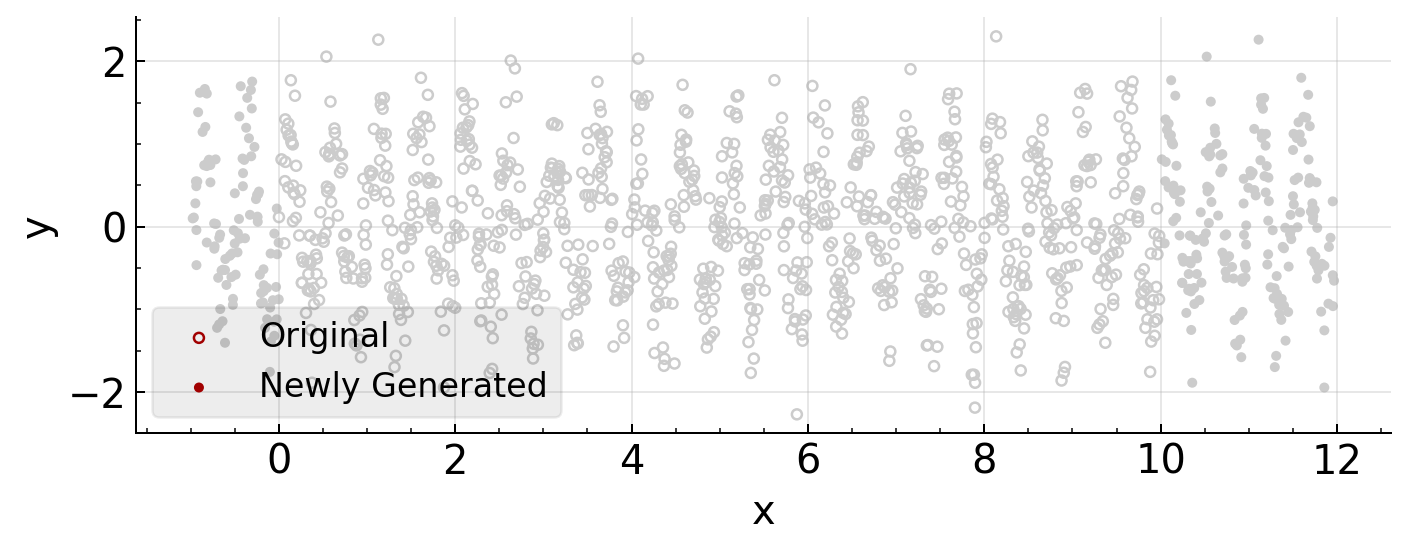

In [5]:
importlib.reload(alprti)

PE = alprti.PeriodicExpansion(x_ref_min=9, x_ref_max=2, minmax="minmax", verbose=0)
PE.fit(y_sin.reshape(1,-1), x_sin)
y_sin_expanded, x_sin_expanded = PE.transform(y_sin.reshape(1,-1), x_sin)

fig, axs = PE.plot_result()
fig.set_figheight(3)

# `PeriodicShift`
Shifting Array Considering Periodic Boundaries

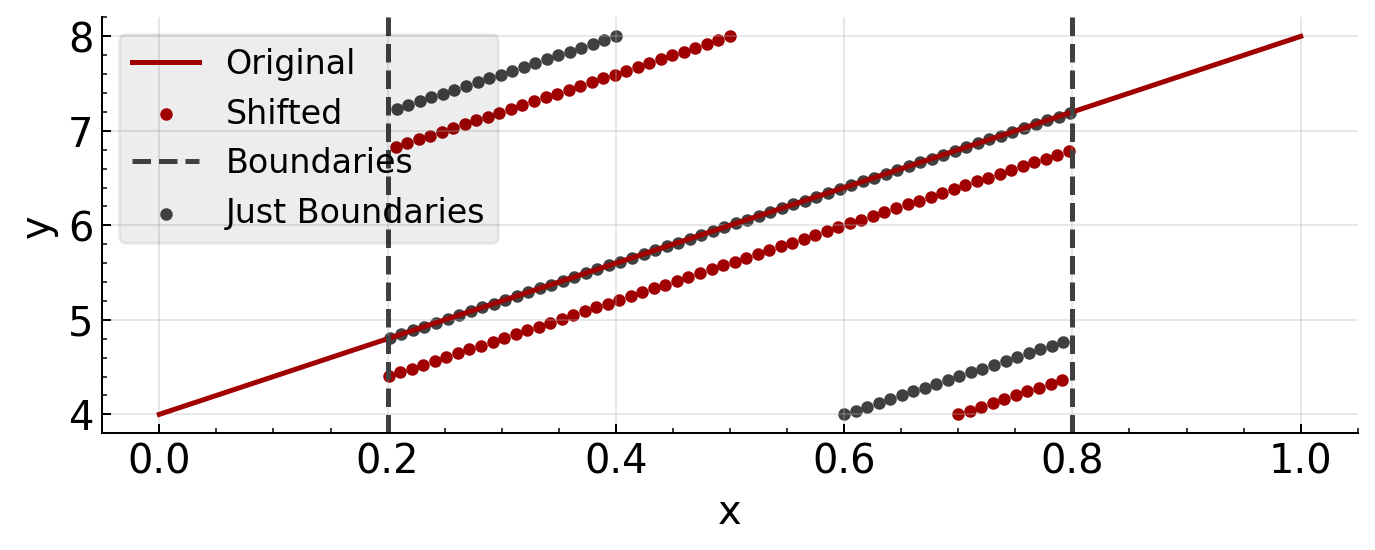

In [6]:
importlib.reload(alprti)
borders = [0.2,0.8]
PS = alprti.PeriodicShift(shift=0.0, borders=borders)
x_per     = PS.fit_transform(x) #just enforcing periodic boundaries
x_shifted = PS.fit_transform(x, shift=0.1) #periodic boundaries + shift

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(111)
fig, axs = PS.plot_result(x, y=y, ax=ax1)
ax1.scatter(x_per, y, label="Just Boundaries")
ax1.legend()
plt.show()


# `Periodize`
Generate Periodic Timeseries from Existing One

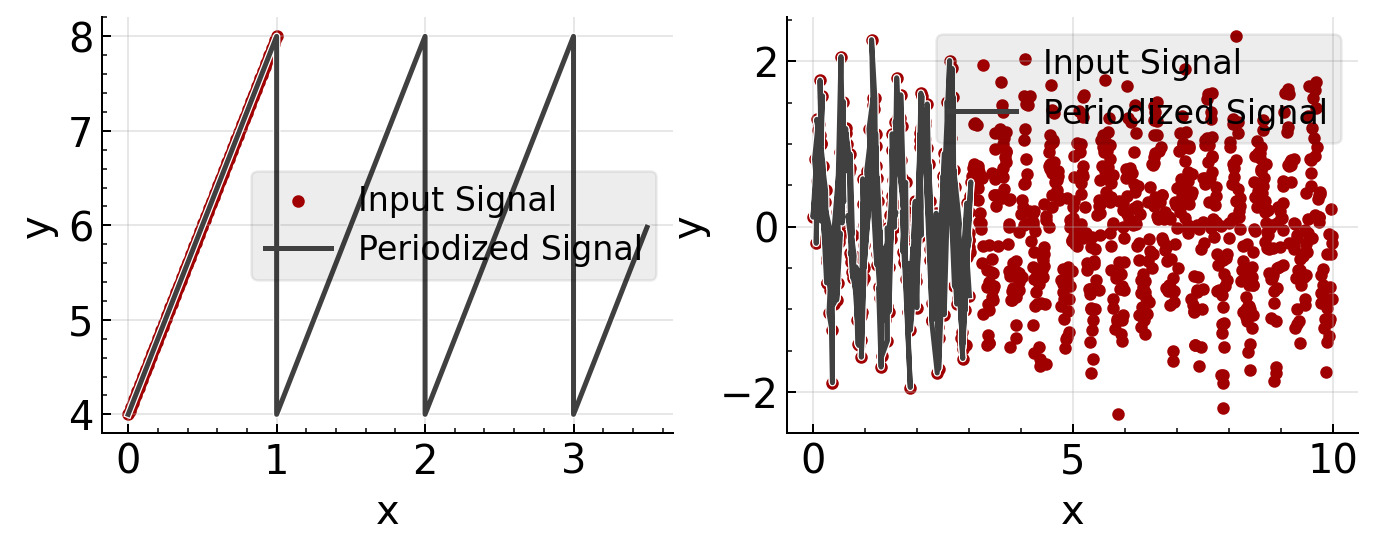

In [7]:
importlib.reload(alprti)
PZ1 = alprti.Periodize(repetitions=3.5)
PZ2 = alprti.Periodize()
x_per1, y_per1 = PZ1.fit_transform(x, y)
x_per2, y_per2 = PZ2.fit_transform(x_sin, y_sin, size=300)
# print(PZ2)

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig, axs = PZ1.plot_result(x, y, ax=ax1)
fig, axs = PZ2.plot_result(x_sin, y_sin, ax=ax2)
plt.show()

# `Resample`

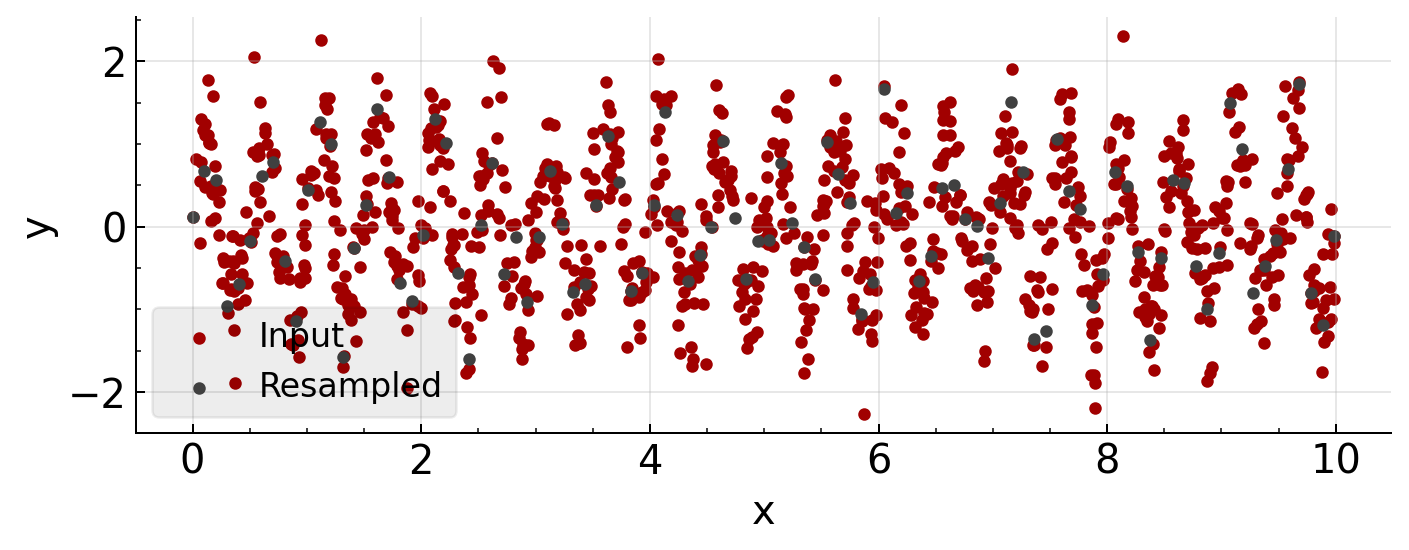

In [8]:
importlib.reload(alprti)
RS = alprti.Resample(size=100)

x_res, y_res = RS.fit_transform(x_sin, y_sin, size=None, transform_kwargs=None)

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(111)
fig, axs = RS.plot_result(x_sin, y_sin, ax=ax1)


# Space Changes Time <-> Phase

## `fold()`
Phase-Folding

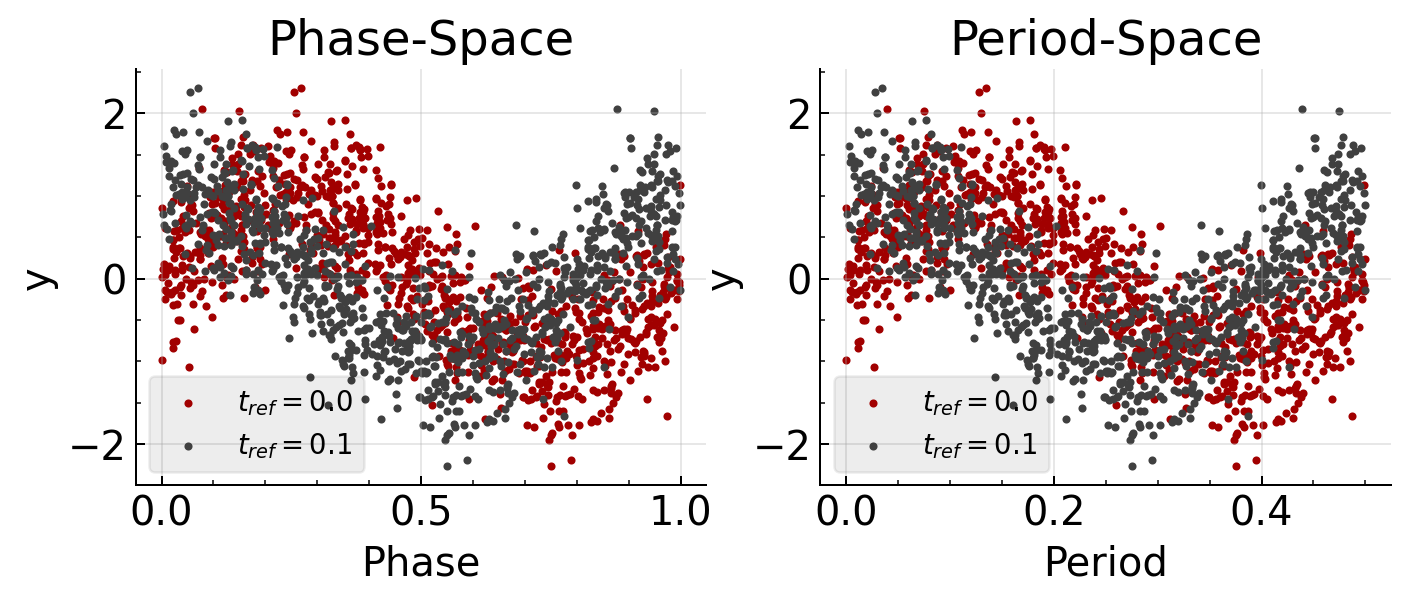

In [9]:
importlib.reload(alprti)
ph1, pe1 = alprti.fold(time=x_sin, period=p, tref=0, verbose=0)
ph2, pe2 = alprti.fold(time=x_sin, period=p, tref=.1, verbose=0)

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(121, title="Phase-Space")
ax2 = fig.add_subplot(122, title="Period-Space")
ax1.scatter(ph1, y_sin, s=5, label=r"$t_{ref} = 0.0$")
ax1.scatter(ph2, y_sin, s=5, label=r"$t_{ref} = 0.1$")
ax2.scatter(pe1, y_sin, s=5, label=r"$t_{ref} = 0.0$")
ax2.scatter(pe2, y_sin, s=5, label=r"$t_{ref} = 0.1$")
ax1.set_xlabel("Phase")
ax2.set_xlabel("Period")
ax1.set_ylabel("y")
ax2.set_ylabel("y")
ax1.legend(fontsize=11)
ax2.legend(fontsize=11)
plt.show()

## `time2phase()`
Time -> Phase

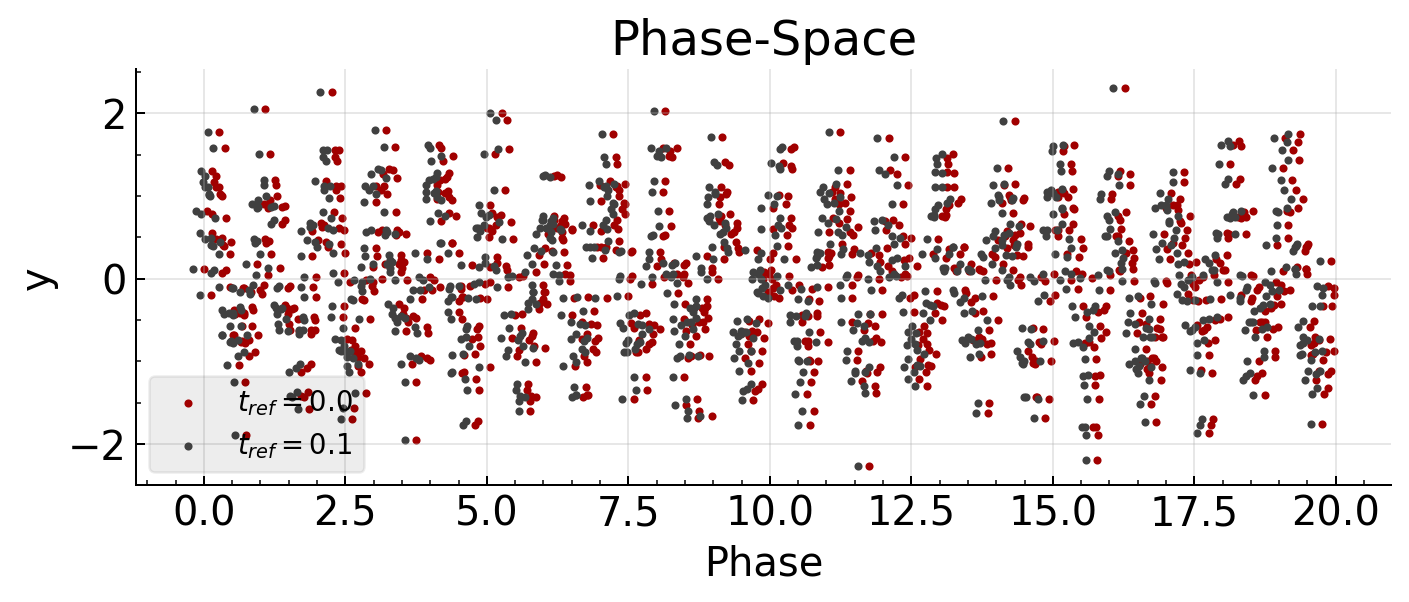

In [10]:
importlib.reload(alprti)
ph1 = alprti.time2phase(time=x_sin, period=p, tref=0.0, verbose=0)
ph2 = alprti.time2phase(time=x_sin, period=p, tref=0.1, verbose=0)

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(111, title="Phase-Space")
ax1.scatter(ph1, y_sin, s=5, label=r"$t_{ref} = 0.0$")
ax1.scatter(ph2, y_sin, s=5, label=r"$t_{ref} = 0.1$")
ax1.set_xlabel("Phase")
ax1.set_ylabel("y")
ax1.legend(fontsize=11)
plt.show()

## `phase2time()`
Phase -> Time

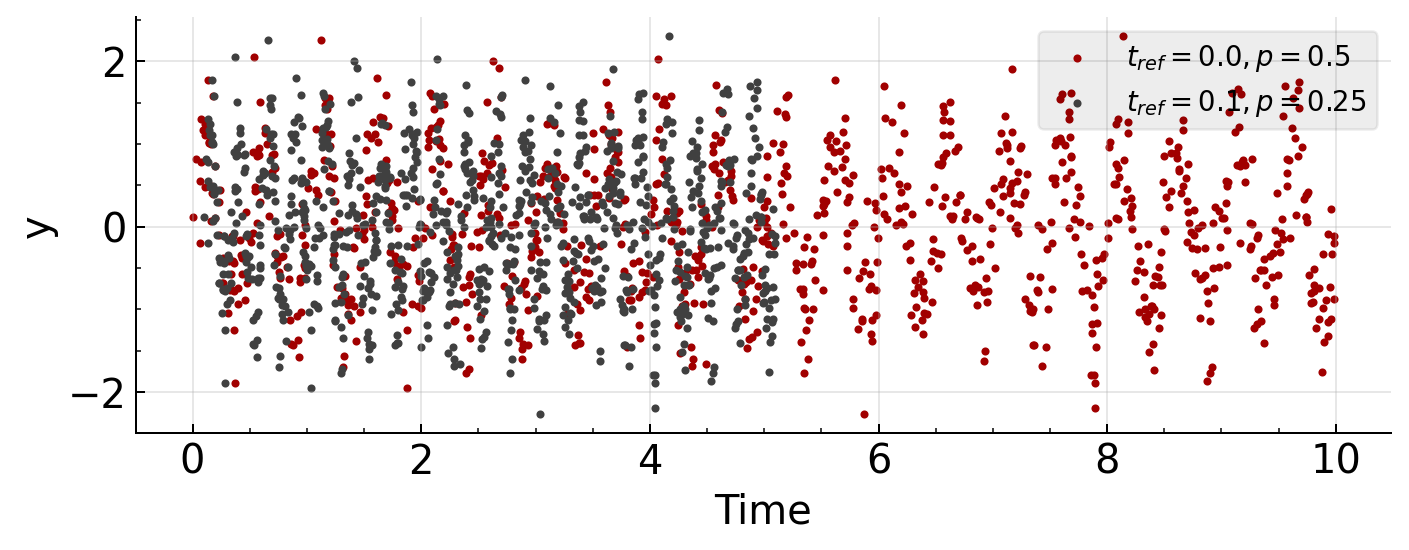

In [11]:
importlib.reload(alprti)
time1 = alprti.phase2time(phase=ph1, period=p, tref=0, verbose=0)
time2 = alprti.phase2time(phase=ph1, period=p/2, tref=.1, verbose=0)

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(111)
ax1.scatter(time1, y_sin, s=5, label=r"$t_{ref} = 0.0, p = 0.5$")
ax1.scatter(time2, y_sin, s=5, label=r"$t_{ref} = 0.1, p = 0.25$")
ax1.set_xlabel("Time")
ax1.set_ylabel("y")
ax1.legend(fontsize=11)
plt.show()